In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords

import re
from wordcloud import WordCloud
import prepare, acquire

In [44]:
plt.rc('figure', figsize=(14, 8))
plt.rc('font', size=14)

In [3]:
df = pd.read_csv('./spam_clean.csv')
df.text = df.text.apply(prepare.basic_clean)
df.head()

,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [4]:
all_text = ' '.join(df.text)
ham_text = ' '.join(df.text[df.label=='ham'])
spam_text = ' '.join(df.text[df.label=='spam'])

In [32]:
# stopword_list = stopwords.words('english')
# sorted(stopword_list)

In [6]:
text_without_stopwords = prepare.remove_stopwords(all_text, 
                          extra_words=['n','u','2','4','ur','im'])
ham_without_stopwords = prepare.remove_stopwords(ham_text, 
                          extra_words=['n','u','2','4','ur','im'])
spam_without_stopwords = prepare.remove_stopwords(spam_text, 
                          extra_words=['n','u','2','4','ur','im'])

In [7]:
# spam_without_stopwords

In [8]:
common_all_words = pd.Series(prepare.remove_stopwords(
                    text_without_stopwords)
                  .split()).value_counts().head(15)
common_ham_words = pd.Series(prepare.remove_stopwords(
                    ham_without_stopwords)
                  .split()).value_counts().head(15)
common_spam_words = pd.Series(prepare.remove_stopwords(
                    spam_without_stopwords)
                  .split()).value_counts().head(15)

In [9]:
common_ham_words

get     303
ltgt    276
ok      272
dont    257
go      247
ill     238
know    232
got     231
like    229
call    229
come    224
good    222
time    189
day     187
love    185
dtype: int64

In [10]:
spam_bigrams = pd.Series(nltk.ngrams(spam_without_stopwords.split(),
                                     2)).value_counts()
ham_bigrams = pd.Series(nltk.ngrams(ham_without_stopwords.split(),
                                    2)).value_counts()
spam_bigrams

(please, call)         44
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
(prize, guaranteed)    22
                       ..
(call, 08715203685)     1
(link, reply)           1
(uk, singles)           1
(sex, fun)              1
(5we, free2day)         1
Length: 6850, dtype: int64

(-0.5, 799.5, 399.5, -0.5)

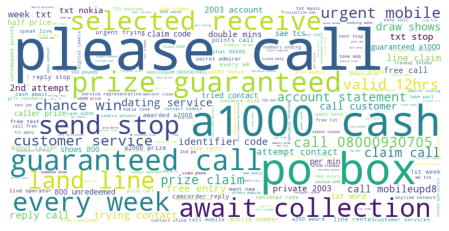

In [11]:
data = {k[0] + ' ' + k[1]: v for k, v in 
        spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', 
            width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

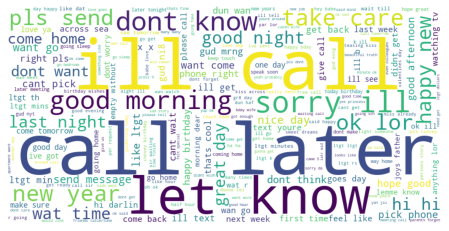

In [12]:
data = {k[0] + ' ' + k[1]: v for k, v in 
        ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', 
            width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [13]:
spam_bigrams

(please, call)         44
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
(prize, guaranteed)    22
                       ..
(call, 08715203685)     1
(link, reply)           1
(uk, singles)           1
(sex, fun)              1
(5we, free2day)         1
Length: 6850, dtype: int64

In [14]:
a = list(spam_bigrams.head(100).index)
b = list(ham_bigrams.head(100).index)

# a = list(spam_bigrams.head(spam_bigrams.shape[0]).index)
# b = list(ham_bigrams.head(ham_bigrams.shape[0]).index)

In [15]:
def check_shared_bigrams(bigrams1, bigrams2, top_x_results):
    a = list(bigrams1.head(top_x_results).index)
    b = list(bigrams2.head(top_x_results).index)
    nk = set(a).intersection(b)
    return nk

In [16]:
check_shared_bigrams(spam_bigrams, ham_bigrams, 200)

{('free', 'call'), ('please', 'call')}

In [17]:
spam_trigrams = pd.Series(nltk.ngrams(spam_without_stopwords.split(),
                                     3)).value_counts()
ham_trigrams = pd.Series(nltk.ngrams(ham_without_stopwords.split(),
                                    3)).value_counts()
ham_trigrams

(ill, call, later)            42
(sorry, ill, call)            38
(happy, new, year)            18
(pls, send, message)          13
(cant, pick, phone)           12
                              ..
(feeling, cheers, lou)         1
(esplanade, fr, home)          1
(phoned, disconnected, id)     1
(going, write, ccna)           1
(second, def, night)           1
Length: 34664, dtype: int64

(-0.5, 799.5, 399.5, -0.5)

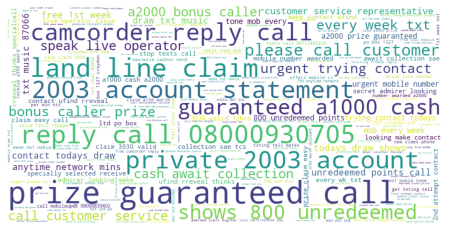

In [18]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in 
        spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', 
            width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

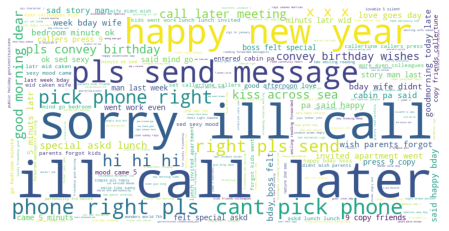

In [19]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in 
        ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', 
            width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [20]:
categories = ['business','entertainment']
df = acquire.get_news_articles(categories).reset_index()
df = df.drop(columns='index')

In [41]:
df['cleaned'] = df.article.apply(prepare.basic_clean)
df.head(2)

,article,author,category,date,title,cleaned,no_stopwords
0,India's Gross Domestic Product (GDP) grew 3.1%...,Krishna Veera Vanamali,business,"29 May 2020,Friday",India's GDP grows 3.1% in January-March quarte...,indias gross domestic product gdp grew 31 in t...,indias gross domestic product gdp grew 31 janu...
1,Billionaire investor Carl Icahn has sold his e...,Krishna Veera Vanamali,business,"29 May 2020,Friday",Billionaire Icahn loses $2B selling entire sta...,billionaire investor carl icahn has sold his e...,billionaire investor carl icahn sold entire st...


In [ ]:
df['no_stopwords'] = df.cleaned.apply(prepare.remove_stopwords)

In [22]:
df.article[0]

"India's Gross Domestic Product (GDP) grew 3.1% in the January-March quarter from a year ago, slowing from downwardly revised 4.1% in the prior three months, official data showed on Friday. The is the slowest pace of expansion since the fourth quarter of 2008-09. The country was under the coronavirus lockdown during the last 7 days of the quarter."

In [23]:
df.cleaned[0]

'indias gross domestic product gdp grew 31 in the januarymarch quarter from a year ago slowing from downwardly revised 41 in the prior three months official data showed on friday the is the slowest pace of expansion since the fourth quarter of 200809 the country was under the coronavirus lockdown during the last 7 days of the quarter'

In [30]:
df.no_stopwords[0]

'indias gross domestic product gdp grew 31 januarymarch quarter year ago slowing downwardly revised 41 prior three months official data showed friday slowest pace expansion since fourth quarter 200809 country coronavirus lockdown last 7 days quarter'

In [40]:
df.head(2)

,article,author,category,date,title,cleaned,no_stopwords
0,India's Gross Domestic Product (GDP) grew 3.1%...,Krishna Veera Vanamali,business,"29 May 2020,Friday",India's GDP grows 3.1% in January-March quarte...,indias gross domestic product gdp grew 31 janu...,indias gross domestic product gdp grew 31 janu...
1,Billionaire investor Carl Icahn has sold his e...,Krishna Veera Vanamali,business,"29 May 2020,Friday",Billionaire Icahn loses $2B selling entire sta...,billionaire investor carl icahn sold entire st...,billionaire investor carl icahn sold entire st...


In [33]:
all_text = ' '.join(df.no_stopwords)
business_text = ' '.join(df.no_stopwords[df.category=='business'])
entertainment_text = ' '.join(df.no_stopwords[df.category
                                         =='entertainment'])

In [35]:
business_bigrams = pd.Series(nltk.ngrams(business_text.split(),
                                     2)).value_counts()
entertainment_bigrams = pd.Series(nltk.ngrams(entertainment_text
                                    .split(), 2)).value_counts()
entertainment_bigrams

(coronavirus, pandemic)    8
(amid, coronavirus)        5
(sonu, sood)               3
(amid, lockdown)           2
(films, like)              2
                          ..
(wont, open)               1
(makeup, totally)          1
(twitter, accounts)        1
(received, views)          1
(set, former)              1
Length: 866, dtype: int64

In [39]:
check_shared_bigrams(business_bigrams, entertainment_bigrams, 900)

{('amid', 'coronavirus'),
 ('coronavirus', 'lockdown'),
 ('coronavirus', 'pandemic'),
 ('five', 'months'),
 ('passed', 'away'),
 ('tamil', 'nadu')}

(-0.5, 1399.5, 799.5, -0.5)

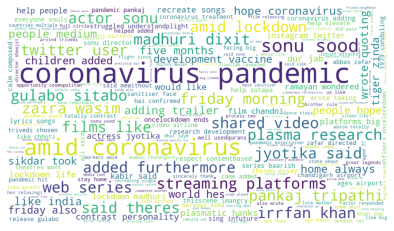

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in 
        entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', 
            width=1400, height=800).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')